# Imports and Helper Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
import math
import warnings

In [2]:
# input is matrix and index
# output is the column
def col(data, index):
    return [row[index] for row in data]

In [3]:
# input the coefficients to a plane, x matrix, and y matrix
# output the value for z
# solve equation ax^2 + by^2 + cz^2 = 1
# coef = [a, b, c]
def getz(coef, x, y):
    # so we have x^2 and y^2
    x = np.square(x)
    y = np.square(y)
    
    # might have negatives in square root but we ignore that since
    # plot will ignore as well
    warnings.filterwarnings("ignore", category=RuntimeWarning) 
    
    # calculate z values
    value = np.divide(np.sqrt(np.subtract(np.subtract\
    (1, np.multiply(coef[0], x)), np.multiply(coef[1], y))), coef[2])
    
    # calculate positive and negative z value for each point
    for i in range(len(value)):
        if i % 2 == 0:
            value[i] = np.multiply(value[i], -1)
            
    return value

# Data Generation and Classification

In [4]:
# the input is the size of the data to be generated
# the output is an array of arrays which contains
# the data in form [bias, x, y, z, classification] and
# the parameters for the spheroid
def gen3Ddata(number):
    data = []
    
    # create data with no classifcation
    for i in range(number):
        data.append([1, np.random.uniform(-1.5, 1.5), \
                     np.random.uniform(-1.5, 1.5), \
                     np.random.uniform(-1.5, 1.5), 0])
    
    # gets a, b, c of our figure
    params = [np.random.uniform(0.5,1) for i in range(3)]
    
    for j in data:
        # classify as 1 if inside the spheroid
        # ax^2 + by^2 + cz^2 = 1
        if np.dot([j[1]**2, j[2]**2, j[3]**2], params[0:3]) < 1:
            j[4] = 1
        else:
            j[4] = -1
    return data, params

In [5]:
# input is params of sphere equations [a, b, c, r]
# output is a bunch of points to visualize the graph 
# in form [x, y, z]
def outputSphere(params):
    # create points on the unit circle
    vec = np.random.randn(3, 100000)
    vec /= np.linalg.norm(vec, axis=0)
    
    # apply coefficients
    for i in range(3):
        np.divide(vec[i], np.sqrt(params[i]))
        
    return vec

# Output Data

In [165]:
# outputs the data and sphere to filename
def outputPoints(data, params, filename):
    # open the filename for writing
    with open(filename, mode = 'w', newline='') as f:
        data_writer = csv.writer(f)
        data_writer.writerow(['x_coords', 'y_coords', 'z_coords', 'type'])
        # X Y Z Classification (-1, 1, or 0 for plane)
        # add data
        for line in data:
            data_writer.writerow([line[1], line[2], line[3], line[4]])
        # add sphere data
        x = np.linspace(-1, 1, 1000)
        y = np.linspace(-1, 1, 1000)
        x = np.repeat(x, 2)
        y = np.repeat(y, 2)
        z = getz(params, x, y)
        for index in range(len(x)):
            data_writer.writerow([x[index], y[index], z[index], 0])

In [8]:
data, params = gen3Ddata(1000)
#outputPoints(data, outputSphere(params), "NonlinearData.csv")

<function matplotlib.pyplot.show(*args, **kw)>

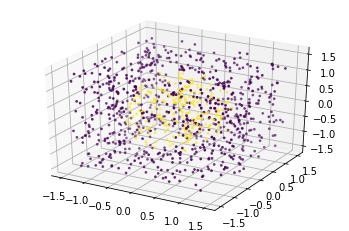

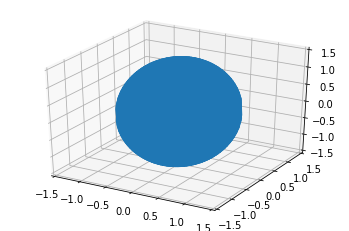

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x,y,z = outputSphere(params)

# make scatter plot
ax.scatter(col(data, 1), col(data, 2), col(data, 3), \
           c=col(data, 4), s = np.pi)
plt.show

fig = plt.figure()
ax = plt.axes(projection='3d')
space = np.linspace(-1, 1, 50)
x, y = np.meshgrid(space, space)
x = np.repeat(x, 2, axis=1)
y = np.repeat(y, 2, axis=1)
z = getz(params, x, y)
ax.plot_wireframe(x, y, z)
ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(-1.5, 1.5)
plt.show

In [166]:
outputPoints(data, params, "NonlinearData.csv")